# Data analysis final project
###### Analyzing Mobile Usage Patterns and User Behavior Classification Across Devices
### data set:Mobile Device Usage and User Behavior Dataset
#### source: Kaggle


# Key Features:

###### -User ID: Unique identifier for each user.
###### -Device Model: Model of the user's smartphone.
###### -Operating System: The OS of the device (iOS or Android).
###### -App Usage Time: Daily time spent on mobile applications, measured in minutes.
###### -Screen On Time: Average hours per day the screen is active.
###### -Battery Drain: Daily battery consumption in mAh.
###### -Number of Apps Installed: Total apps available on the device.
###### -Data Usage: Daily mobile data consumption in megabytes.
###### -Age: Age of the user.
###### -Gender: Gender of the user (Male or Female).
###### -User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

In [1]:
# importing the needed libraryes
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# reading the data fram and cheack random 10 rows to get idea about data
df=pd.read_csv('user_behavior_dataset.csv')
df.sample(n=10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
314,315,iPhone 12,iOS,281,4.9,1566,59,632,29,Male,3
13,14,Xiaomi Mi 11,Android,215,4.9,1662,43,857,43,Male,3
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
107,108,Google Pixel 5,Android,54,1.4,403,17,278,23,Female,1
488,489,Xiaomi Mi 11,Android,416,7.3,1882,62,1333,32,Female,4
642,643,Google Pixel 5,Android,502,8.2,2597,90,1553,27,Male,5
290,291,OnePlus 9,Android,448,7.6,2199,66,1047,28,Male,4
494,495,Samsung Galaxy S21,Android,107,2.5,1176,24,545,29,Female,2
311,312,iPhone 12,iOS,341,7.2,2397,68,1055,32,Female,4
604,605,OnePlus 9,Android,182,5.3,1278,42,885,54,Female,3


In [8]:
# now we start the journy of data valdeation and cheack the data quality
df.duplicated().sum()

0

In [9]:
#we have an id colum may be it hide the duplication 
df.drop('User ID',axis=1,inplace=True)

In [10]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [11]:
df.duplicated().sum()

0

##### no duplicates found the next step is cheack for nulls

In [13]:
df.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

##### no null values found
###### next step cheack the data types for each colum

In [15]:
df.dtypes

Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

##### data types are propriate types

In [17]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

### **Descriptive Analysis**
1. What is the distribution of **App Usage Time**, **Screen On Time**, and **Battery Drain** across different age groups or genders?
2. What is the average number of apps installed and data usage per user?
3. Which device models and operating systems are most common among users?
4. How is user behavior distributed across the different **User Behavior Class** categories?

In [20]:
df_age=df.groupby('Age')[['App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)']].mean()

In [27]:
df_age['Screen On Time (hours/day)']=df['Screen On Time (hours/day)']*10

In [31]:
# we also notice that number of people from the same age is not eaual in each
df_age.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day)
Age,,,
18,264.272727,14.0,1650.818182
19,248.583333,85.0,1461.916667
20,282.764706,26.0,1698.000000
21,332.352941,116.0,1853.882353
22,344.708333,65.0,1806.583333


In [34]:
#for the line ploting we need to reshape the data fram and make the Age colum

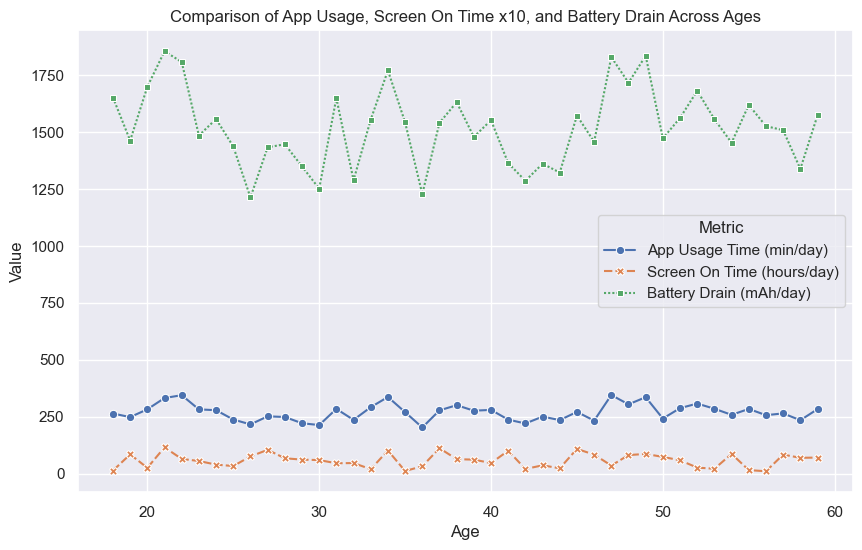

In [36]:

df_age = df_age.reset_index()

# Melt the df to long format
df_age= df_age.melt(id_vars='Age', 
value_vars=['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)'],var_name='Metric', value_name='Value')

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Age", y="Value", hue="Metric", style="Metric", markers=True, data=df_age)
plt.title('Comparison of App Usage, Screen On Time x10, and Battery Drain Across Ages')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

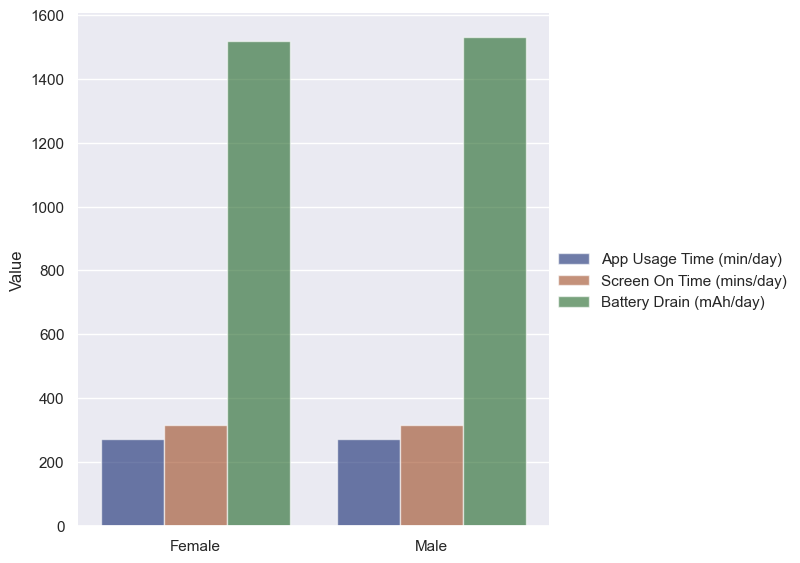

In [37]:
df_gender = df.groupby('Gender')[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)']].mean()
df_gender['Screen On Time (mins/day)']=df_gender['Screen On Time (hours/day)']*60
df_gender.drop('Screen On Time (hours/day)',axis=1)
df_gender = df_gender.reset_index()
#for ploting we need the data to be long shaped to use the catplot
df_gender_melted = df_gender.melt(id_vars='Gender', 
                                  value_vars=['App Usage Time (min/day)', 'Screen On Time (mins/day)', 'Battery Drain (mAh/day)'],
                                  var_name='Metric', 
                                  value_name='Value')

sns.set_theme(style="darkgrid")

g = sns.catplot(
    data=df_gender_melted, kind="bar",
    x="Gender", y="Value", hue="Metric",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Value")
g.legend.set_title("")
plt.show()


In [39]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

##### the common devices are ('Xiaomi Mi 11,iPhone 12')

In [41]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [42]:
os_gender=df.groupby('Gender')['Operating System'].value_counts()

In [46]:
os_gender=os_gender.reset_index()
os_gender.columns = ['Gender', 'Operating System', 'number of users']

In [49]:
os_gender

,Gender,Operating System,number of users
0,Female,Android,262
1,Female,iOS,74
2,Male,Android,292
3,Male,iOS,72


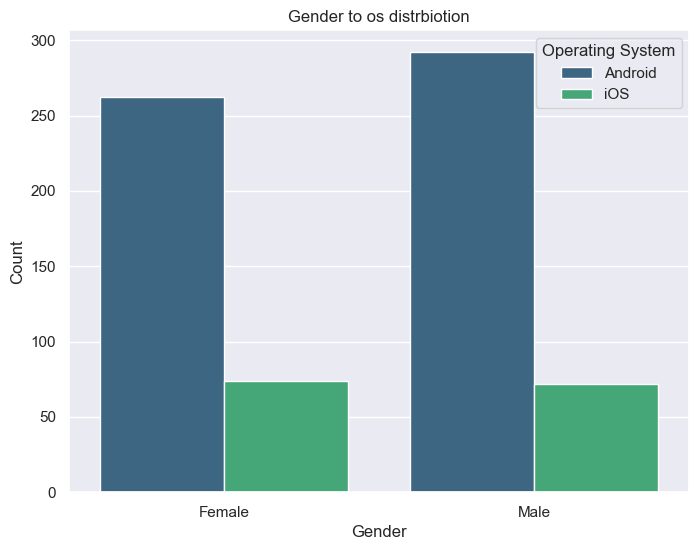

In [51]:
plt.figure(figsize=(8, 6))
sns.barplot(data=os_gender, x='Gender', y='number of users', hue='Operating System', palette='viridis')
plt.title('Gender to os distrbiotion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Now we need to Know how do the different vectors effects the users behivor

In [54]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [56]:
df.groupby('User Behavior Class')[['Data Usage (MB/day)','Age','App Usage Time (min/day)','Screen On Time (hours/day)']].mean().reset_index()

,User Behavior Class,Data Usage (MB/day),Age,App Usage Time (min/day),Screen On Time (hours/day)
0,1,202.323529,38.213235,60.426471,1.490441
1,2,451.417808,38.643836,131.972603,3.037671
2,3,822.013986,38.678322,235.398601,4.955944
3,4,1232.230216,38.676259,395.748201,6.909353
4,5,1974.772059,38.176471,541.419118,10.114706


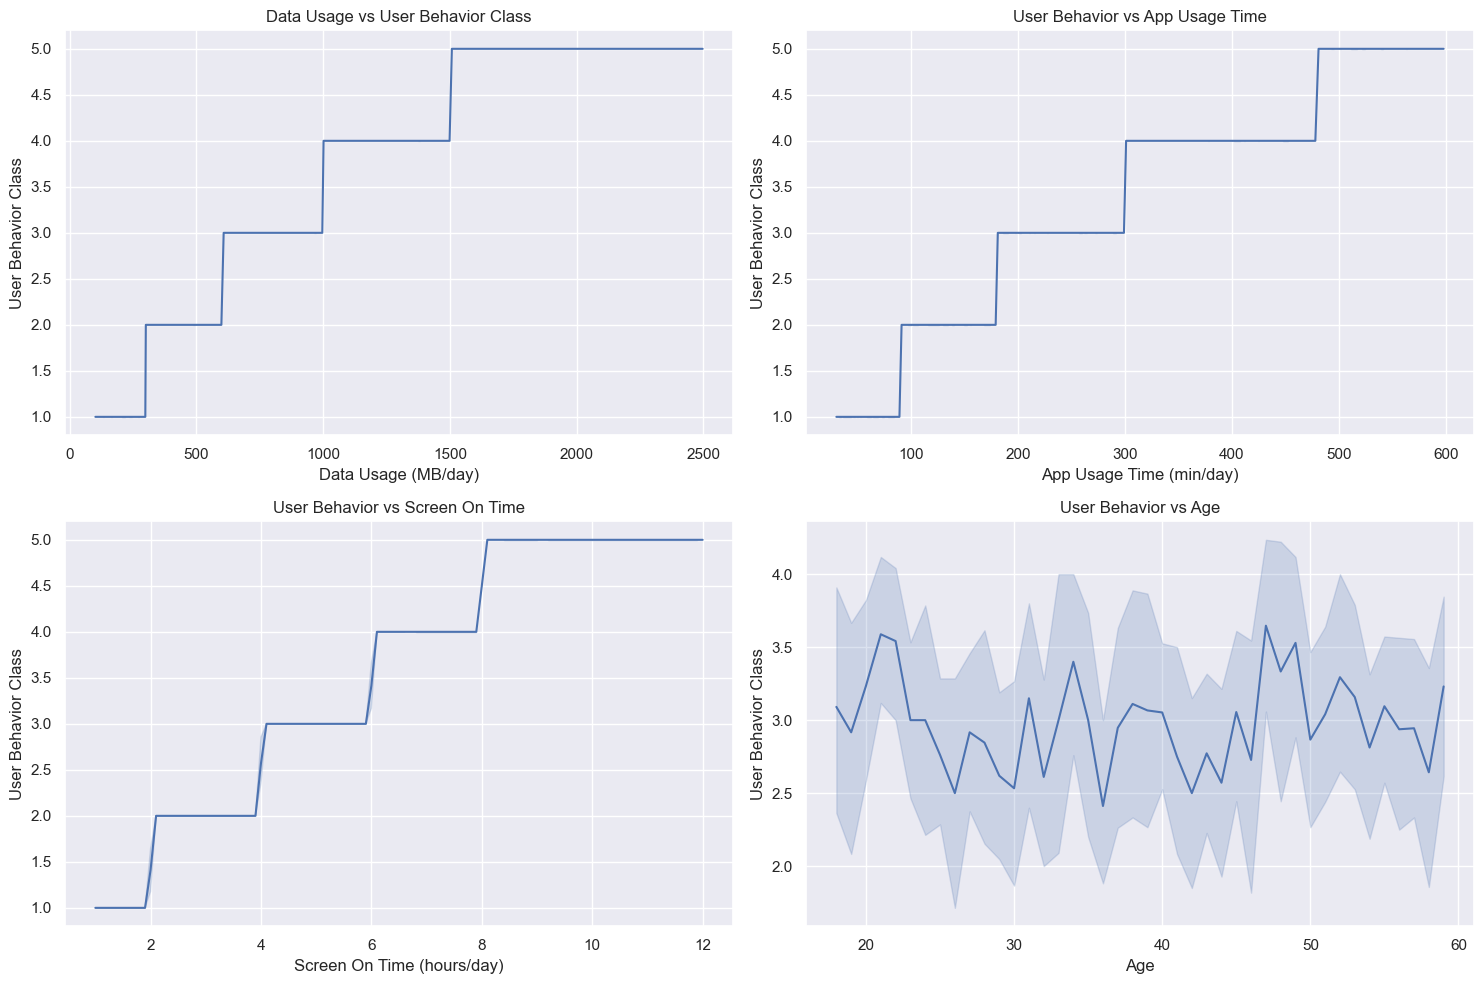

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# Plot 1: Data Usage vs User Behavior Class
sns.lineplot(x='Data Usage (MB/day)', y='User Behavior Class', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Data Usage vs User Behavior Class')
axes[0, 0].set_xlabel('Data Usage (MB/day)')


# Plot 2: Data Usage vs App Usage Time
sns.lineplot(x='App Usage Time (min/day)', y='User Behavior Class', data=df, ax=axes[0, 1])
axes[0, 1].set_title('User Behavior vs App Usage Time')
axes[0, 1].set_xlabel('App Usage Time (min/day)')

# Plot 3: Data Usage vs Screen On Time
sns.lineplot(x='Screen On Time (hours/day)', y='User Behavior Class', data=df, ax=axes[1, 0])
axes[1, 0].set_title('User Behavior vs Screen On Time')
axes[1, 0].set_xlabel('Screen On Time (hours/day)')

# Plot : Data Usage vs Screen On Time
sns.lineplot(x='Age', y='User Behavior Class', data=df, ax=axes[1,1])
axes[1, 1].set_title('User Behavior vs Age')
axes[1, 1].set_xlabel('Age')


plt.ylabel('User Behavior Class')
plt.tight_layout()
plt.show()


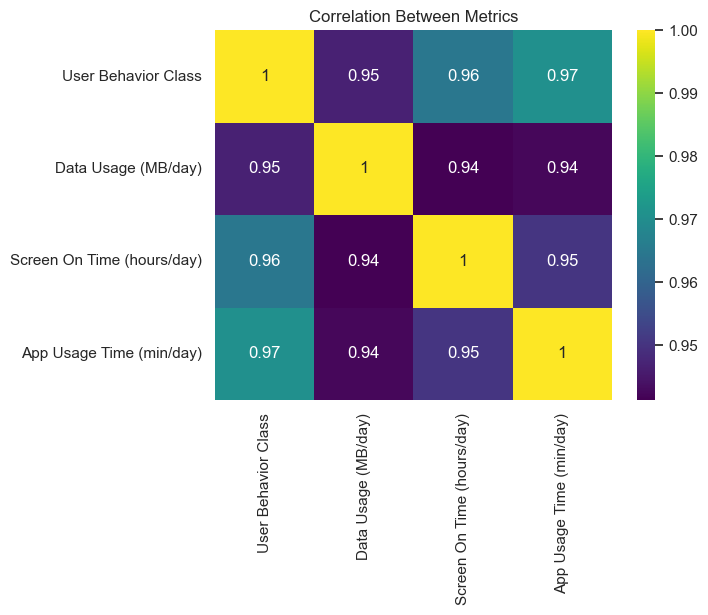

In [58]:
sns.heatmap(df[['User Behavior Class', 'Data Usage (MB/day)', 'Screen On Time (hours/day)', 'App Usage Time (min/day)']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Between Metrics')
plt.show()


### From the data and the heatmap,we can notice that:
       -users in class 1 (the worest) are using data around 202Mb/day ,data is on dsplay for approx an houer and the app 
         usage is being used  for an hour aslo
        -users in class 5  are using data around 1970 Mb/day ,data is on dsplay for approx 9 hours and the app 
         usage is being used  for an 10 
         the age is not an important vector

In [61]:
#now we need to know if the gender is being a vector in the data usage and timeing
df.groupby('Gender')[['Data Usage (MB/day)','App Usage Time (min/day)','Screen On Time (hours/day)']].mean()

,Data Usage (MB/day),App Usage Time (min/day),Screen On Time (hours/day)
Gender,,,
Female,914.321429,271.967262,5.261310
Male,943.978022,270.354396,5.283242


# the gender is not a main player in the data distrpution as the number are very close

# now we need how does the divece type is playing in the numbers


In [64]:
df.groupby('Device Model')[['Data Usage (MB/day)','App Usage Time (min/day)','Screen On Time (hours/day)','User Behavior Class']].mean()

,Data Usage (MB/day),App Usage Time (min/day),Screen On Time (hours/day),User Behavior Class
Device Model,,,,
Google Pixel 5,897.704225,267.788732,5.076056,2.915493
OnePlus 9,911.120301,270.383459,5.241353,2.977444
Samsung Galaxy S21,931.872180,266.421053,5.318045,2.977444
Xiaomi Mi 11,940.164384,268.452055,5.293151,2.972603
iPhone 12,965.506849,282.020548,5.430822,3.102740


# numbers are very close, as the number of users per Device Model are very close so it has no effecite on usage and behavior

In [21]:
df[df['App Usage Time (min/day)'].apply(lambda x: isinstance(x, int))]

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
